# Statistical Analisys

Installation of the needed component for our notebook. 

In [ ]:
!pip install biopython
!pip install bioinfokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 8.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 84 kB 2.9 MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.8-py3-none-any.whl size=56750 sha256=b050275aa02d45ca2545278f0178ccff48602ce7a4a8d2b8b9bb6ed4e4f42b2d
  Stored in directory: /root/.cache/pip/wheels/0d/b0/a4/2be59655e33c889f2197d43e99ed077f05a6559e24ce28e21a
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7097 sha256=615b95555aed2c3b7a01618f5d1a513cc010b897f99d4ede3797721af896a9c3
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built bioinfokit adjustText


Import of all the needed libraries

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from bioinfokit.analys import stat

import pandas as pd
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load data from csv

Load the data from the csv file generated by the python script generateScores.py. The CSV file contains the ndcg@5 measure obatined by different version of our system with  different submitted queries. 

In [ ]:
filecsv = "/content/trec_eval_results_run_BM25_Rel.csv" #path to the csv file
df = pd.read_csv(filecsv, sep = ',')  

## BM25 with different synonims score thesholds using Relevance Judgments

We have generated a lot of runs of our system in the following configuration: BM25 Similarity used, Query Expansion with synonims generated by the main token and also by all the tokens of the query by using different score thresholds. A lot of runs are equal so we extract from them only the ones that are different.

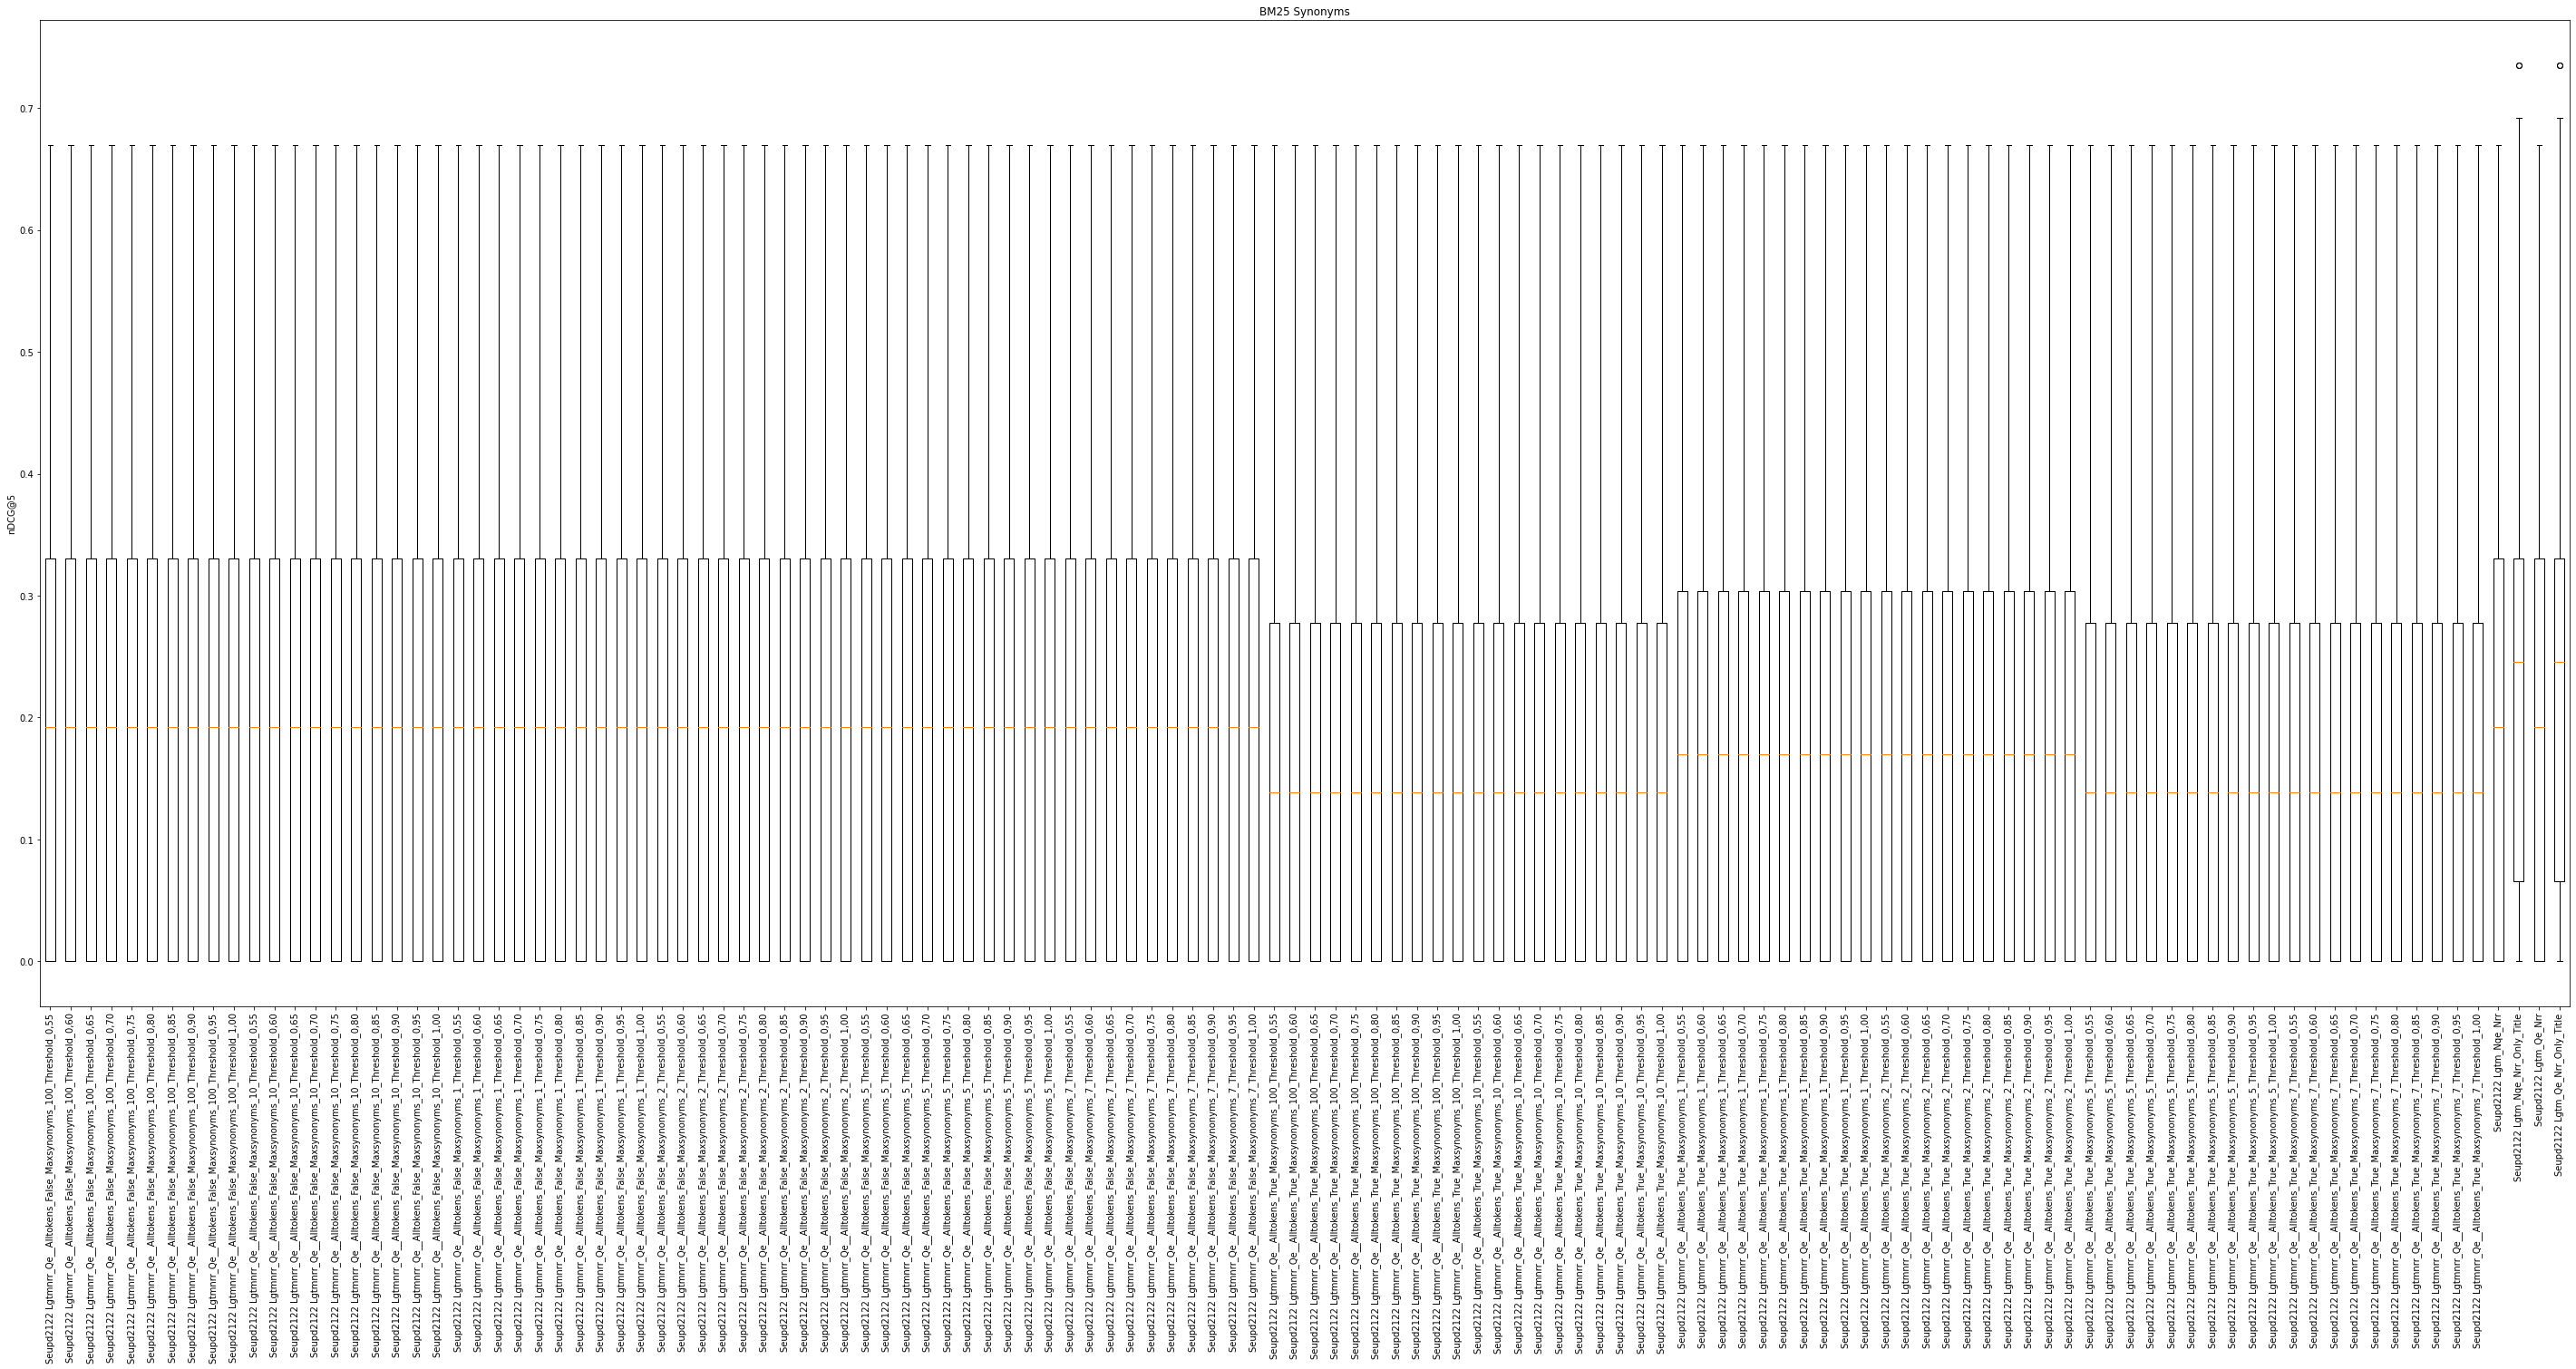

In [ ]:
data = df[df.columns[1:]]

matplotlib.rc('figure', figsize=(50, 20))

values = data.values
plt.boxplot(values)
plt.ylabel('nDCG@5')
plt.title('BM25 Synonyms')
plt.xticks(np.arange(1,len(df.columns)), df.columns[1:] ,rotation=90)
plt.show()


From the previous runs we select only the different clusters by looking at the boxplots and we compare them. 

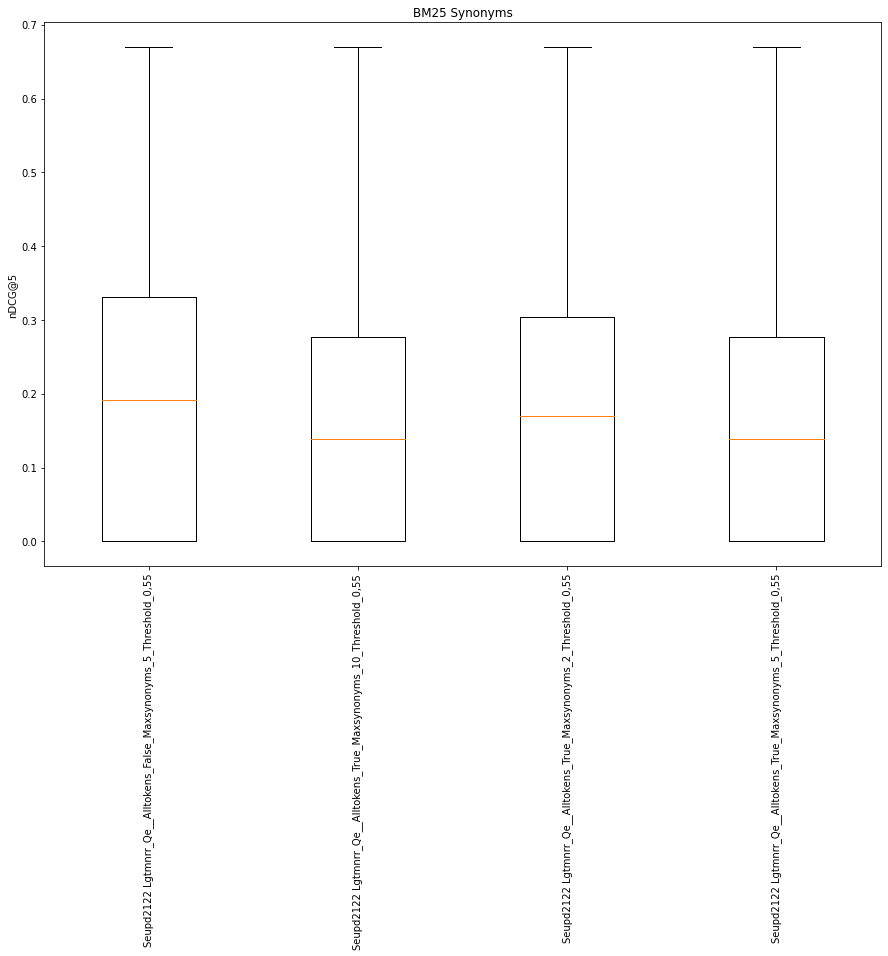


 
 ************** ONE WAY ANOVA **************** 

             df    sum_sq   mean_sq        F    PR(>F)
runs        3.0  0.042403  0.014134  0.46572  0.706525
Residual  200.0  6.069860  0.030349      NaN       NaN


/usr/local/lib/python3.7/dist-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]



 
 ************** PAIRWISE T TEST **************** 

                                              group1  \
0  Seupd2122 Lgtmnrr_Qe__Alltokens_False_Maxsynon...   
1  Seupd2122 Lgtmnrr_Qe__Alltokens_False_Maxsynon...   
2  Seupd2122 Lgtmnrr_Qe__Alltokens_False_Maxsynon...   
3  Seupd2122 Lgtmnrr_Qe__Alltokens_True_Maxsynony...   
4  Seupd2122 Lgtmnrr_Qe__Alltokens_True_Maxsynony...   
5  Seupd2122 Lgtmnrr_Qe__Alltokens_True_Maxsynony...   

                                              group2      Diff     Lower  \
0  Seupd2122 Lgtmnrr_Qe__Alltokens_True_Maxsynony...  0.035020 -0.054363   
1  Seupd2122 Lgtmnrr_Qe__Alltokens_True_Maxsynony...  0.027643 -0.061740   
2  Seupd2122 Lgtmnrr_Qe__Alltokens_True_Maxsynony...  0.035020 -0.054363   
3  Seupd2122 Lgtmnrr_Qe__Alltokens_True_Maxsynony...  0.007376 -0.082006   
4  Seupd2122 Lgtmnrr_Qe__Alltokens_True_Maxsynony...  0.000000 -0.089383   
5  Seupd2122 Lgtmnrr_Qe__Alltokens_True_Maxsynony...  0.007376 -0.082006   

      Upper   q-valu

In [ ]:
filecsv = "/content/trec_eval_results_runs_BM25_Rel_Clust.csv" #path to the csv file
df = pd.read_csv(filecsv, sep = ',')  

data = df[df.columns[1:]]

matplotlib.rc('figure', figsize=(15, 10))

values = data.values
plt.boxplot(values)
plt.ylabel('nDCG@5')
plt.title('BM25 Synonyms')
plt.xticks(np.arange(1,len(df.columns)), df.columns[1:] ,rotation=90)
plt.show()

df_melted = pd.melt(df.reset_index(), id_vars=['index'], value_vars = df.columns[1:])
df_melted.columns = ['index','runs','value']

#one-way anova
res = stat()
res.anova_stat(df=df_melted, res_var='value', anova_model='value ~ runs')

print("\n \n ************** ONE WAY ANOVA **************** \n")
print(res.anova_summary)

#Perform multiple pairwise comparison (Tukey's HSD)
res = stat()
res.tukey_hsd(df=df_melted, res_var='value', xfac_var='runs', anova_model='value ~ runs')

print("\n \n ************** PAIRWISE T TEST **************** \n")
print(res.tukey_summary)

## LMDirichelt with different synonims score thesholds by using Relevance Judgments

We have generated a lot of runs of our system in the following configuration: BM25 Similarity used, Query Expansion with synonims generated by the main token and also by all the tokens of the query by using different score thresholds. A lot of runs are equal so we extract from them only the ones that are different.

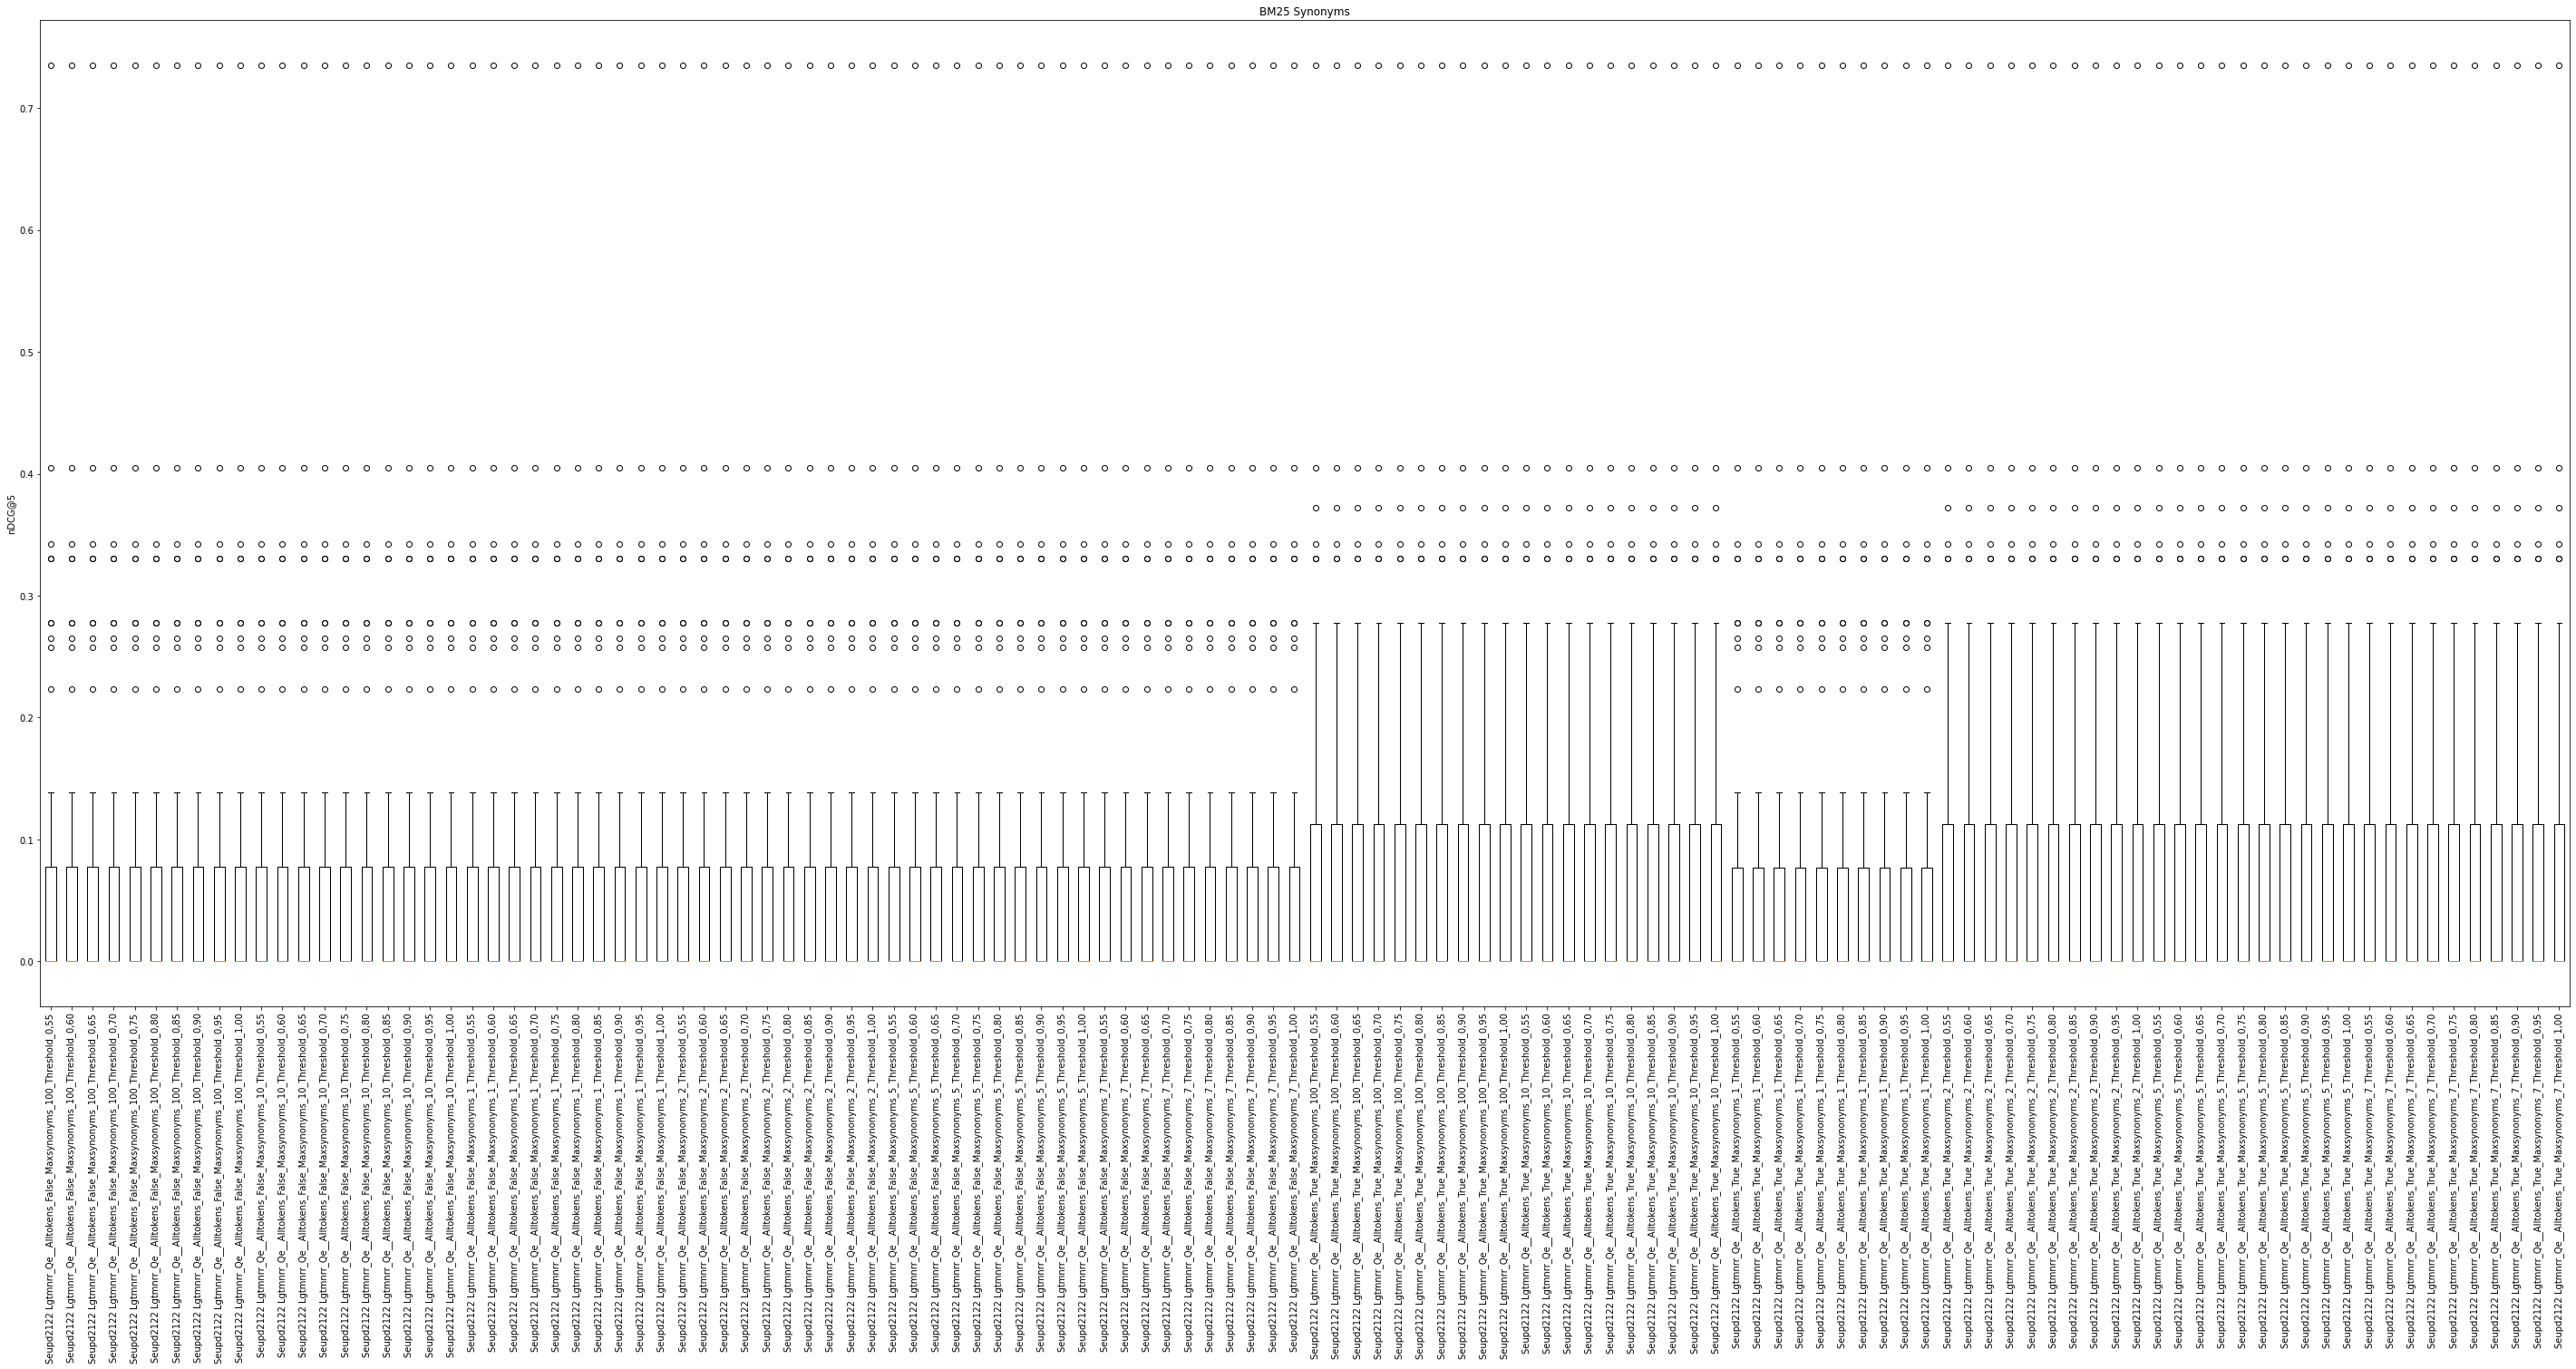


 
 ************** ONE WAY ANOVA **************** 

              df      sum_sq   mean_sq         F  PR(>F)
runs       119.0    0.034127  0.000287  0.012475     1.0
Residual  6000.0  137.934235  0.022989       NaN     NaN


/usr/local/lib/python3.7/dist-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]



 
 ************** PAIRWISE T TEST **************** 

                                                 group1  \
0     Seupd2122 Lgtmnrr_Qe__Alltokens_False_Maxsynon...   
1     Seupd2122 Lgtmnrr_Qe__Alltokens_False_Maxsynon...   
2     Seupd2122 Lgtmnrr_Qe__Alltokens_False_Maxsynon...   
3     Seupd2122 Lgtmnrr_Qe__Alltokens_False_Maxsynon...   
4     Seupd2122 Lgtmnrr_Qe__Alltokens_False_Maxsynon...   
...                                                 ...   
7135  Seupd2122 Lgtmnrr_Qe__Alltokens_True_Maxsynony...   
7136  Seupd2122 Lgtmnrr_Qe__Alltokens_True_Maxsynony...   
7137  Seupd2122 Lgtmnrr_Qe__Alltokens_True_Maxsynony...   
7138  Seupd2122 Lgtmnrr_Qe__Alltokens_True_Maxsynony...   
7139  Seupd2122 Lgtmnrr_Qe__Alltokens_True_Maxsynony...   

                                                 group2  Diff     Lower  \
0     Seupd2122 Lgtmnrr_Qe__Alltokens_False_Maxsynon...   0.0 -0.131663   
1     Seupd2122 Lgtmnrr_Qe__Alltokens_False_Maxsynon...   0.0 -0.131663   
2     Seupd2

In [ ]:
filecsv = "/content/trec_eval_results_runs_LM_Rel.csv" #path to the csv file
df = pd.read_csv(filecsv, sep = ',')  

data = df[df.columns[1:]]

matplotlib.rc('figure', figsize=(50, 20))

values = data.values
plt.boxplot(values)
plt.ylabel('nDCG@5')
plt.title('BM25 Synonyms')
plt.xticks(np.arange(1,len(df.columns)), df.columns[1:] ,rotation=90)
plt.show()

df_melted = pd.melt(df.reset_index(), id_vars=['index'], value_vars = df.columns[1:])
df_melted.columns = ['index','runs','value']

#one-way anova
res = stat()
res.anova_stat(df=df_melted, res_var='value', anova_model='value ~ runs')

print("\n \n ************** ONE WAY ANOVA **************** \n")
print(res.anova_summary)

#Perform multiple pairwise comparison (Tukey's HSD)
res = stat()
res.tukey_hsd(df=df_melted, res_var='value', xfac_var='runs', anova_model='value ~ runs')

print("\n \n ************** PAIRWISE T TEST **************** \n")
print(res.tukey_summary)

From the previous runs we select only the different clusters by looking at the boxplots and we compare them. 


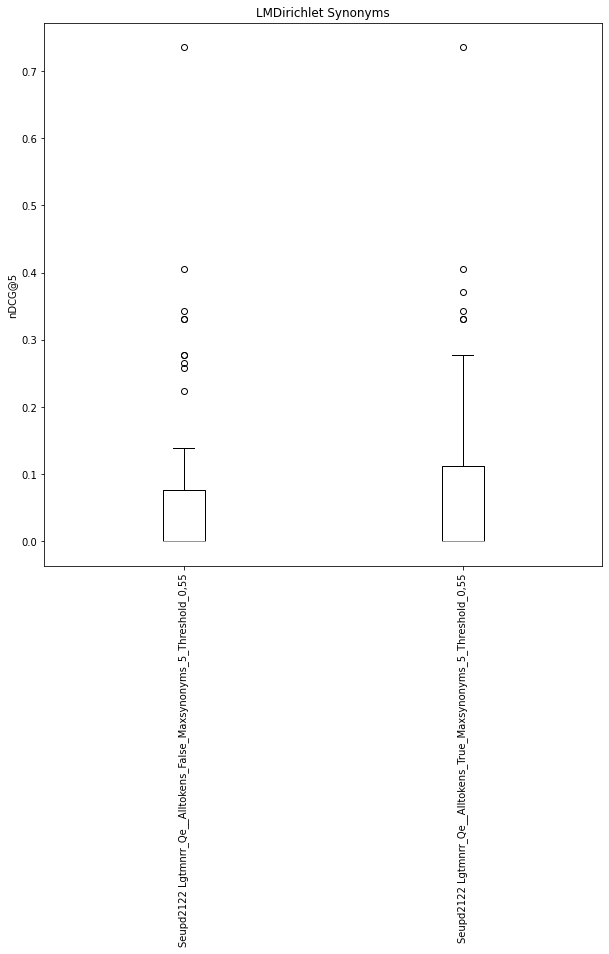


 
 ************** ONE WAY ANOVA **************** 

             df    sum_sq   mean_sq         F    PR(>F)
runs        1.0  0.000520  0.000520  0.022483  0.881112
Residual  100.0  2.312794  0.023128       NaN       NaN


/usr/local/lib/python3.7/dist-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]



 
 ************** PAIRWISE T TEST **************** 

                                              group1  \
0  Seupd2122 Lgtmnrr_Qe__Alltokens_False_Maxsynon...   

                                              group2      Diff     Lower  \
0  Seupd2122 Lgtmnrr_Qe__Alltokens_True_Maxsynony...  0.004516 -0.055234   

      Upper   q-value   p-value  
0  0.064265  0.212051  0.882603  


In [ ]:
filecsv = "/content/trec_eval_results_runs_LM_Rel_Clust.csv" #path to the csv file
df = pd.read_csv(filecsv, sep = ',')  

data = df[df.columns[1:]]

matplotlib.rc('figure', figsize=(10, 10))

values = data.values
plt.boxplot(values)
plt.ylabel('nDCG@5')
plt.title('LMDirichlet Synonyms')
plt.xticks(np.arange(1,len(df.columns)), df.columns[1:] ,rotation=90)
plt.show()

df_melted = pd.melt(df.reset_index(), id_vars=['index'], value_vars = df.columns[1:])
df_melted.columns = ['index','runs','value']

#one-way anova
res = stat()
res.anova_stat(df=df_melted, res_var='value', anova_model='value ~ runs')

print("\n \n ************** ONE WAY ANOVA **************** \n")
print(res.anova_summary)

#Perform multiple pairwise comparison (Tukey's HSD)
res = stat()
res.tukey_hsd(df=df_melted, res_var='value', xfac_var='runs', anova_model='value ~ runs')

print("\n \n ************** PAIRWISE T TEST **************** \n")
print(res.tukey_summary)

## Comparison between the best systems configurations with synonims

From the previous runs we select only the best runs obtained with BM25 and LMDirichlet with Synonims and we compare them to the best system configuration with only BM25 without synonims. 

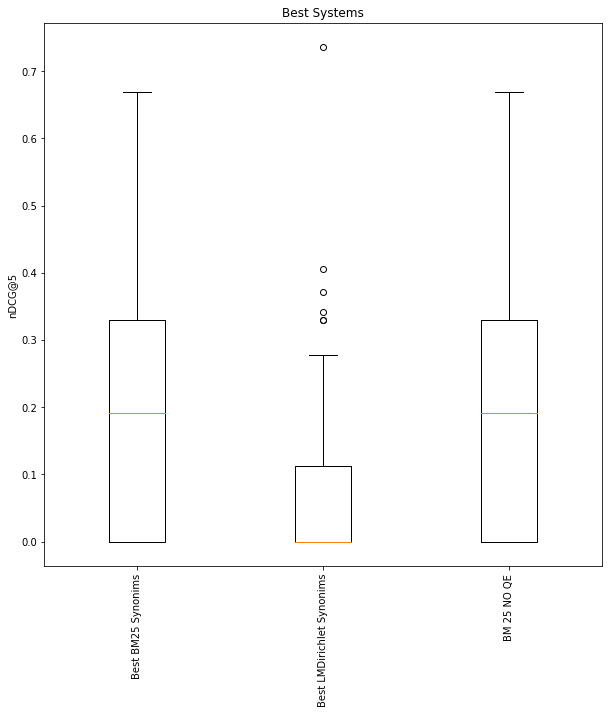


 
 ************** ONE WAY ANOVA **************** 

             df    sum_sq   mean_sq         F    PR(>F)
runs        2.0  0.501900  0.250950  8.054597  0.000476
Residual  150.0  4.673421  0.031156       NaN       NaN

 
 ************** PAIRWISE T TEST **************** 

                                              group1  \
0  Seupd2122 Lgtmnrr_Qe__Alltokens_False_Maxsynon...   
1  Seupd2122 Lgtmnrr_Qe__Alltokens_False_Maxsynon...   
2  Seupd2122 Lgtmnrr_Qe__Alltokens_True_Maxsynony...   

                                              group2      Diff     Lower  \
0  Seupd2122 Lgtmnrr_Qe__Alltokens_True_Maxsynony...  0.121498  0.038747   
1                             Seupd2122 Lgtm_Nqe_Nrr  0.000000 -0.082751   
2                             Seupd2122 Lgtm_Nqe_Nrr  0.121498  0.038747   

      Upper   q-value   p-value  
0  0.204249  4.915668  0.001916  
1  0.082751  0.000000  0.900000  
2  0.204249  4.915668  0.001916  


/usr/local/lib/python3.7/dist-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


In [ ]:
filecsv = "/content/trec_eval_results_runs_best_systems.csv"
df = pd.read_csv(filecsv, sep = ',')  

data = df[df.columns[1:]]

matplotlib.rc('figure', figsize=(10, 10))

values = data.values
plt.boxplot(values)
plt.ylabel('nDCG@5')
plt.title('Best Systems')
plt.xticks(np.arange(1,len(df.columns)), ['Best BM25 Synonims', 'Best LMDirichlet Synonims', 'BM 25 NO QE'] ,rotation=90)
plt.show()

df_melted = pd.melt(df.reset_index(), id_vars=['index'], value_vars = df.columns[1:])
df_melted.columns = ['index','runs','value']

#one-way anova
res = stat()
res.anova_stat(df=df_melted, res_var='value', anova_model='value ~ runs')

print("\n \n ************** ONE WAY ANOVA **************** \n")
print(res.anova_summary)

#Perform multiple pairwise comparison (Tukey's HSD)
res = stat()
res.tukey_hsd(df=df_melted, res_var='value', xfac_var='runs', anova_model='value ~ runs')

print("\n \n ************** PAIRWISE T TEST **************** \n")
print(res.tukey_summary)